<a href="https://colab.research.google.com/github/nogueiradesn/repo_principal/blob/main/Analisando_os_Dados_do_Airbnb_Denver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Denver*
*by [David Nogueira](https://github.com)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Denver, Colorado, United States, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data/).
Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:
*   `listings.csv` - 	Summary information and metrics for listings in Denver (good for visualisations).

Importante: O portal está em constante evolução, então pode ser que o conjunto de dados utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

In [71]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [72]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/co/denver/2023-09-24/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional do problema e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - tipo de quarto que é oferecido
* price - preço da diária para alugar a propriedade
* minimum_nights - quantidade mínima de noites permitida para reservar
* number_of_reviews - número de avaliações que a propriedade possui
* last_review - data da última avaliação recebida
* reviews_per_month - quantidade média de avaliações por mês recebidas
* calculated_host_listing_count - quantidade de propriedades do mesmo anfitrião listada no Airbnb
* availability_365 - número de dias de disponibilidade no período de 365 dias
* number_of_reviews_ltm - número de avaliações que a propriedade recebeu nos últimos 12 meses
* license - número de registro, licença ou permissão

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [73]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,360,Guesthouse in Denver · ★4.99 · 2 bedrooms · 2 ...,666,Jennifer & Giovanni,NaN,Highland,39.766415,-105.002098,Entire home/apt,90,30,179,2023-08-05,2.87,2,147,7,2017-BFN-0002177
1,364,Loft in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,783,Jason,NaN,Five Points,39.766720,-104.979060,Entire home/apt,179,185,87,2016-04-26,0.50,1,358,0,NaN
2,590,Home in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,933,Jill,NaN,North Park Hill,39.755110,-104.911090,Private room,64,1,712,2023-08-27,4.04,2,233,43,2021-BFN-0000578
3,592,Home in Denver · ★4.87 · 1 bedroom · 1 bed · 1...,933,Jill,NaN,North Park Hill,39.754810,-104.911060,Private room,57,28,168,2023-06-24,0.95,2,158,1,2021-BFN-0000578
4,686,Home in Denver · ★4.76 · 1 bedroom · 2 beds · ...,990,Alexandra,NaN,North Capitol Hill,39.746950,-104.978380,Private room,33,30,256,2021-07-16,1.39,2,288,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de variáveis de cada coluna.
Esse dataset que baixamos é a versão "resumida" do Airbnb. Mesmo assim já existe o suficiente para nossas análises.

In [74]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 5388
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A variável `license` possui mais de 1/3 de valores nulos.
* As variáveis `reviews_per_month` e `last_review` possuem 14,57% de valores nulos.

In [75]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes em valor percentual
100*(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            37.787676
reviews_per_month                  14.569414
last_review                        14.569414
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

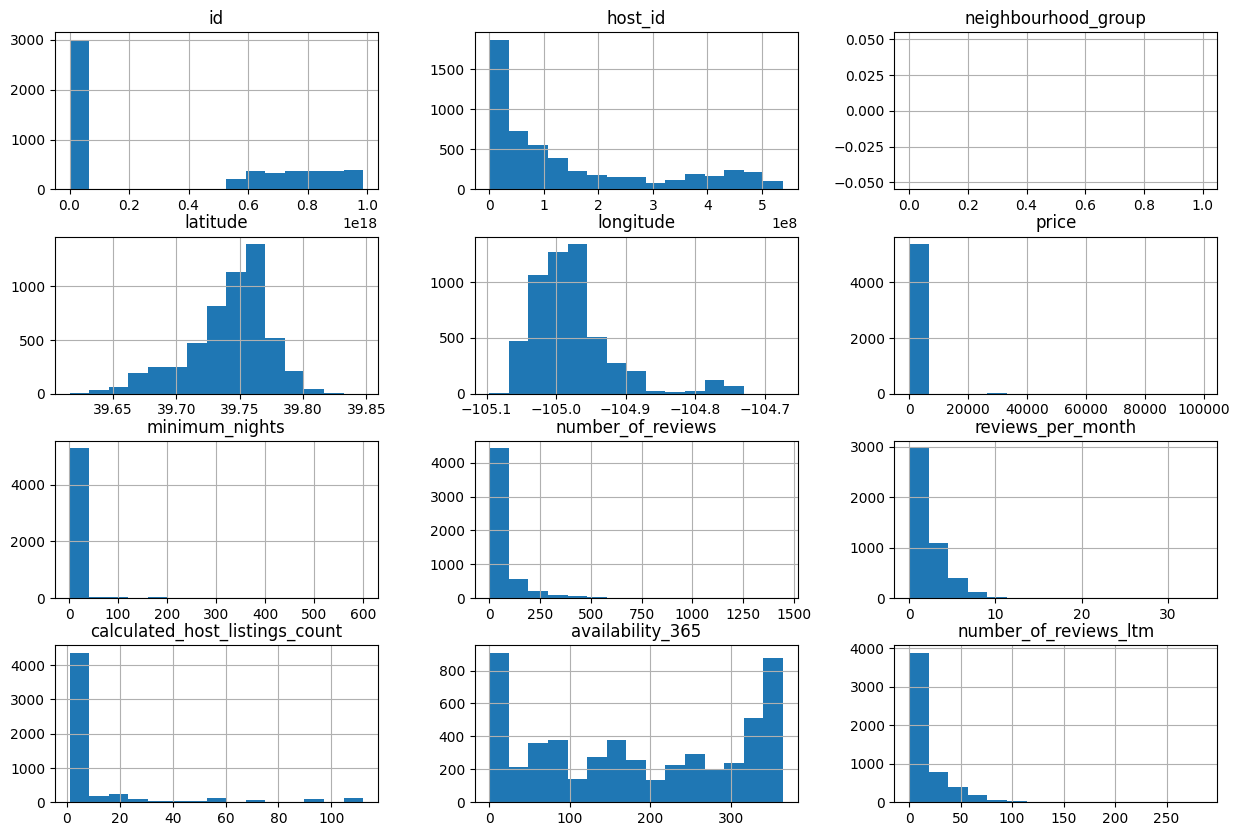

In [76]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Podemos observar que o preço médio em uma propriedade é de U$ 251,03, porém o gráfico está muito distorcido justamente por conta dos *outliers*.

In [77]:
# ver a média da coluna `price``
df.price.mean()

251.0283964365256

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [78]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.015798,-0.011962,-0.014857,0.000602,-0.027857,-0.007076
minimum_nights,-0.015798,1.000000,-0.196151,-0.358906,0.076532,0.083541,-0.354503
number_of_reviews,-0.011962,-0.196151,1.000000,0.600939,-0.156688,-0.075352,0.645515
reviews_per_month,-0.014857,-0.358906,0.600939,1.000000,-0.126567,-0.048735,0.828029
calculated_host_listings_count,0.000602,0.076532,-0.156688,-0.126567,1.000000,0.027464,-0.148445
availability_365,-0.027857,0.083541,-0.075352,-0.048735,0.027464,1.000000,-0.070215
number_of_reviews_ltm,-0.007076,-0.354503,0.645515,0.828029,-0.148445,-0.070215,1.000000


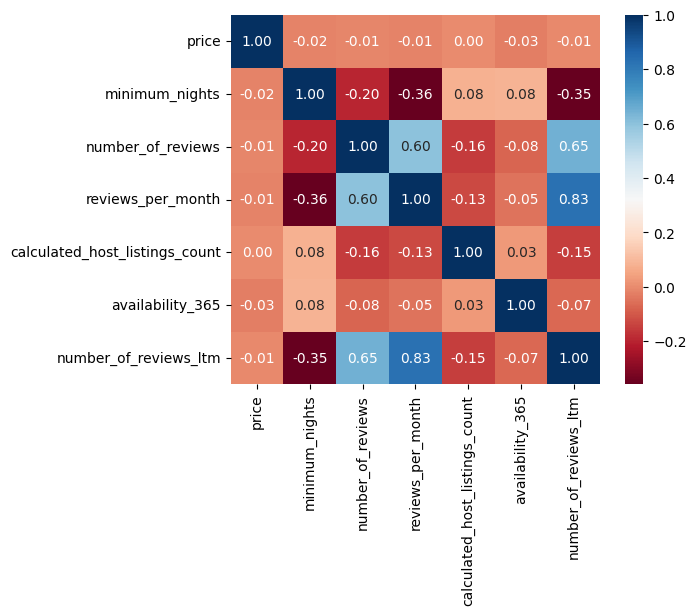

In [79]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Podemos repara que os únicos parâmetros correlacionados (mais azuis) são números de avaliações totais, números de avaliações por mês e números de avaliações dos últimos 12 meses. Faz sentido que sejam relacionadas, já que esses três parâmetros avaliam a mesma coisa, mas por períodos distintos.




### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [80]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    4565
Private room        780
Shared room          36
Hotel room            7
Name: room_type, dtype: int64

In [81]:
# mostrar a porcentagem de cada tipo de imóvel disponível
100*df.room_type.value_counts()/df.shape[0]

Entire home/apt    84.725316
Private room       14.476615
Shared room         0.668151
Hotel room          0.129918
Name: room_type, dtype: float64

A grande maioria dos aluguéis do Airbnb vem de casas/apartamentos inteiros e uma boa parte de quartos privados. Isso equivale a mais de 99% das acomodações de Denver.

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [82]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
North Park Hill    1459.650000
Cheesman Park       773.184783
Lincoln Park        538.405405
Capitol Hill        511.386076
Sunnyside           362.559524
West Highland       356.366460
Belcaro             352.333333
Regis               326.464286
Highland            312.856707
Jefferson Park      305.714286
Name: price, dtype: float64

Eu escolhi a cidade de Denver para analisar porque estive lá uma vez, mas não conheço nada sobre os bairros, como quais mais nobres ou mais simples, de forma não tenho como dizer se o preço médio por região mostrado acima faz sentido. Portanto, fiz uma [breve pesquisa](https://denverrelocationguide.com/top-10-most-expensive-neighborhoods-to-rent-in-denver/) no Google para descobrir os bairros mais caros e comparar com meus resultados.
Eu pude perceber que bairros como *North Park Hill*, *Cheesman Park* e *Lincoln Park* não estão no top 10 bairros mais caros de acordo com o *site* de referência. Isso provavelmente ocorreu por conta de alguns *outliers* e para confirmar, criei o seguinte gráfico abaixo referente ao preço em *North Park Hill*:

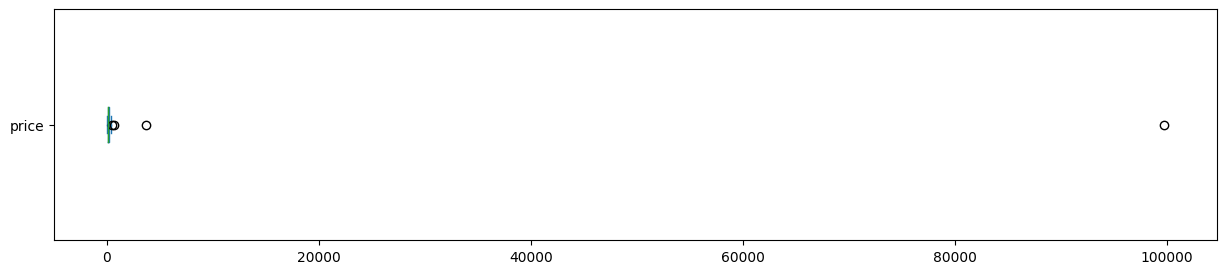

In [83]:
# Criar um gráfio estilo box para verificar a distribuição de preços em North Park Hill
df[df.neighbourhood == "North Park Hill"].price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

Claramente percebe-se que *North Park Hill* não é um local caro como aparentou na primeira análise, visto que somente há 3 entradas com valores acima de 450 dólares a diária e sua média é 1459 dólares a diária. Para ter uma análise mais precisa, vamos limitar que cada diária de todo o dataframe não pode passar de 1000 dólares, já que isso equivale a mais de 99% de todos os dados e trará mais confiabilidade na análise de qual bairro é mais caro de se alugar.

In [84]:
# Criar um dataframe somente com acomodações em North Park Hill
nph = df[df.neighbourhood == "North Park Hill"]

In [85]:
# ver quantidade de valores acima de 30 dias para minimum_nights
print("price: valores acima de 450:")
print("{} entradas".format(len(nph[nph.price > 450])))
print("{:.2f}%".format((len(nph[nph.price > 450]) / nph.shape[0])*100))

price: valores acima de 450:
3 entradas
3.75%


In [131]:
# Criando um novo dataframe com a limitação de no máximo U$ 1.000,00 a diária
dfx = df[df.price <= 1000]

In [132]:
# Verificar a porcentagem de dados que estamos utilizando comparado ao dataframe inicial
dfx.shape[0]/df.shape[0]

0.9920193021529324

In [133]:
# Nova análise das vizinhanças mais caras
dfx.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hilltop                        276.100000
University Park                257.000000
Belcaro                        242.571429
Wellshire                      237.250000
College View - South Platte    233.933333
Country Club                   226.800000
Jefferson Park                 212.509615
Highland                       211.332298
Union Station                  210.211055
Washington Park                209.972222
Name: price, dtype: float64

Percebe-se que faz mais sentido agora quanto às médias de preços para as diárias, já que não há valores tão discrepantes. Além disso, de acordo com a pesquisa feita anteriormente, bairros como *University Park*, *College View - South Platte* e *Washington Park* estão na lista dos 10 locais mais caros, enquanto não havia nenhum bairro compatível na lista anterior.
Com toda certeza é possível fazer uma análise mais profunda e procurar *outliers* na lista acima, como por exemplo *Hilltop* que possui vários pontos longe da sua mediana, enquanto *Wellshire* possui apenas 8 acomodações, sendo que uma atinge o valor de 800 dólares a diária, o que se considera um *outlier*. Porém, a ideia aqui não é destrinchar tão aprofundamente dentro dos dados, e sim eliminar os dados mais absurdos e gerar uma análise mais fidedigna possível.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Da mesma maneira que foram analisados os preços de cada diária, para avaliar a média do mínimo de noites para aluguel, já podemos verificar se há *outliers* e eliminá-los de forma a utilizar pelo menos 99% dos dados

<Axes: >

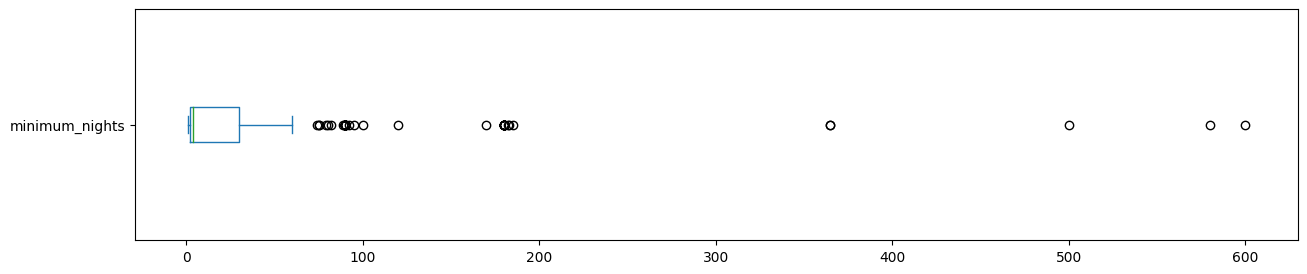

In [146]:
# Verificar outliers através do gráfico estilo box
dfx.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)

Como pode-se perceber, há dados com mínimos de noite equivalentes a mais de 1 ano, o que não faz sentido. Por isso, vamos limitar em até 90 dias, visto que o airbnb é um aplicativo para aluguel por períodos menores e acima dessa quantidade de dias é extremamente raro de acontecer.

In [166]:
# Criar um novo dataframe limitando a no máximo 90 dias para a coluna minimum_nights
dfy = dfx[dfx.minimum_nights <= 90]

In [156]:
# Verificando a porcentagem de dados utilizados
dfy.shape[0]/dfx.shape[0]

0.9943872778297475

In [167]:
# ver a média da coluna `minimum_nights`
dfy.minimum_nights.mean()

15.863781749764817

Portanto, a quantidade média de dias mínimos para se alugar uma acomodação em Denver é de aproximadamente 16 dias.

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial, especialmente quando não há expectativas quanto aos resultados da análise.